# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.21it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.92               0.91     0.91      0.92   
KNeighborsClassifier               0.91               0.90     0.90      0.91   
NuSVC                              0.91               0.90     0.90      0.91   
RandomForestClassifier             0.90               0.89     0.89      0.90   
QuadraticDiscriminantAnalysis      0.90               0.89     0.89      0.90   
LGBMClassifier                     0.89               0.89     0.89      0.89   
LabelSpreading                     0.89               0.89     0.89      0.89   
LabelPropagation                   0.89               0.88     0.88      0.89   
BaggingClassifier                  0.88               0.87     0.87      0.88   
DecisionTreeClassifier             0.88               0.87     0.87      0.88   
XGBClassifier                      0.88               0.87     0.87      0.88   
GaussianNB                         0.88               0.86     0.86      0.88   
ExtraTreesClassifier               0.86               0.86     0.86      0.86   
ExtraTreeClassifier                0.85               0.84     0.84      0.86   
NearestCentroid                    0.83               0.83     0.83      0.84   
AdaBoostClassifier                 0.85               0.83     0.83      0.85   
LogisticRegression                 0.85               0.82     0.82      0.85   
CalibratedClassifierCV             0.85               0.82     0.82      0.85   
LinearSVC                          0.85               0.82     0.82      0.85   
LinearDiscriminantAnalysis         0.84               0.81     0.81      0.84   
RidgeClassifier                    0.83               0.79     0.79      0.83   
RidgeClassifierCV                  0.83               0.79     0.79      0.83   
SGDClassifier                      0.73               0.79     0.79      0.73   
PassiveAggressiveClassifier        0.77               0.74     0.74      0.77   
Perceptron                         0.73               0.74     0.74      0.74   
BernoulliNB                        0.74               0.67     0.67      0.72   
DummyClassifier                    0.56               0.51     0.51      0.55   
CheckingClassifier                 0.65               0.50     0.50      0.51   

                               Time Taken  
Model                                      
SVC                                  0.01  
KNeighborsClassifier                 0.02  
NuSVC                                0.01  
RandomForestClassifier               0.15  
QuadraticDiscriminantAnalysis        0.01  
LGBMClassifier                       0.04  
LabelSpreading                       0.01  
LabelPropagation                     0.01  
BaggingClassifier                    0.04  
DecisionTreeClassifier               0.01  
XGBClassifier                        0.04  
GaussianNB                           0.01  
ExtraTreesClassifier                 0.11  
ExtraTreeClassifier                  0.02  
NearestCentroid                      0.01  
AdaBoostClassifier                   0.12  
LogisticRegression                   0.01  
CalibratedClassifierCV               0.03  
LinearSVC                            0.01  
LinearDiscriminantAnalysis           0.01  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.01  
SGDClassifier                        0.01  
PassiveAggressiveClassifier          0.01  
Perceptron                           0.01  
BernoulliNB                          0.01  
DummyClassifier                      0.01  
CheckingClassifier                   0.01

## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


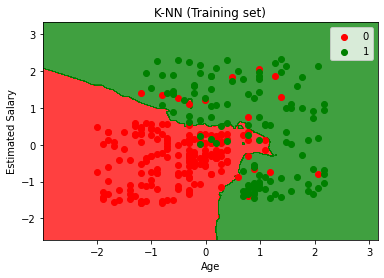

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


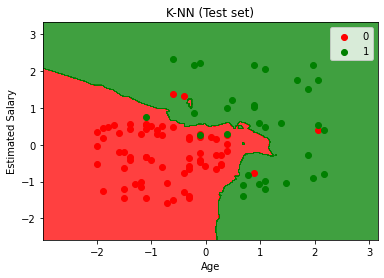

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()